In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report

import firebase_admin
from firebase_admin import credentials, firestore
from torchvision import datasets

#### Firebase Setup ##################################################################################################################
if not firebase_admin._apps:
    cred = credentials.Certificate('serviceAccount.json')
    firebase_admin.initialize_app(cred)
db = firestore.client()

print("Firebase ok")

/home/andrea/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Firebase ok


In [7]:
labels = []
docs = db.collection('claude3_miniImageNet').stream()

true_labels = []
predicted_labels = []

for doc in docs:
    if doc.id == "last_index":
        continue
    doc_ref = db.collection('claude3_miniImageNet').document(doc.id)
    doc_dict = doc.to_dict()
    true_labels.append(doc_dict['True Label'])
    predicted_labels.append(doc_dict['Predicted_Label'])

labels = np.unique(np.concatenate((predicted_labels, true_labels)))
labels

array(['African_hunting_dog', 'Arctic_fox', 'French_bulldog',
       'Gordon_setter', 'Ibizan_hound', 'Newfoundland', 'Saluki',
       'Tibetan mastiff', 'Tibetan_mastiff', 'Walker_hound',
       'aircraft_carrier', 'ant', 'ashcan', 'barrel', 'beer_bottle',
       'black-footed_ferret', 'bolete', 'bookshop', 'boxer', 'cannon',
       'carousel', 'carton', 'catamaran', 'chime', 'clog',
       'cocktail_shaker', 'combination_lock', 'consomme', 'coral_reef',
       'crate', 'cuirass', 'dalmatian', 'dishrag', 'dome', 'dugong',
       'ear', 'electric_guitar', 'file', 'fire_screen', 'frying_pan',
       'garbage_truck', 'golden_retriever', 'goose', 'green_mamba',
       'hair_slide', 'harvestman', 'holster', 'horizontal_bar', 'hotdog',
       'hourglass', 'house_finch', 'iPod', 'jellyfish', 'king_crab',
       'komondor', 'ladybug', 'lion', 'lipstick', 'malamute', 'meerkat',
       'miniature_poodle', 'miniskirt', 'missile', 'mixing_bowl',
       'nematode', 'oboe', 'orange', 'organ', 'para

In [8]:
for el in predicted_labels:
    if (el not in labels):
        print(f"ERROR: {el}")

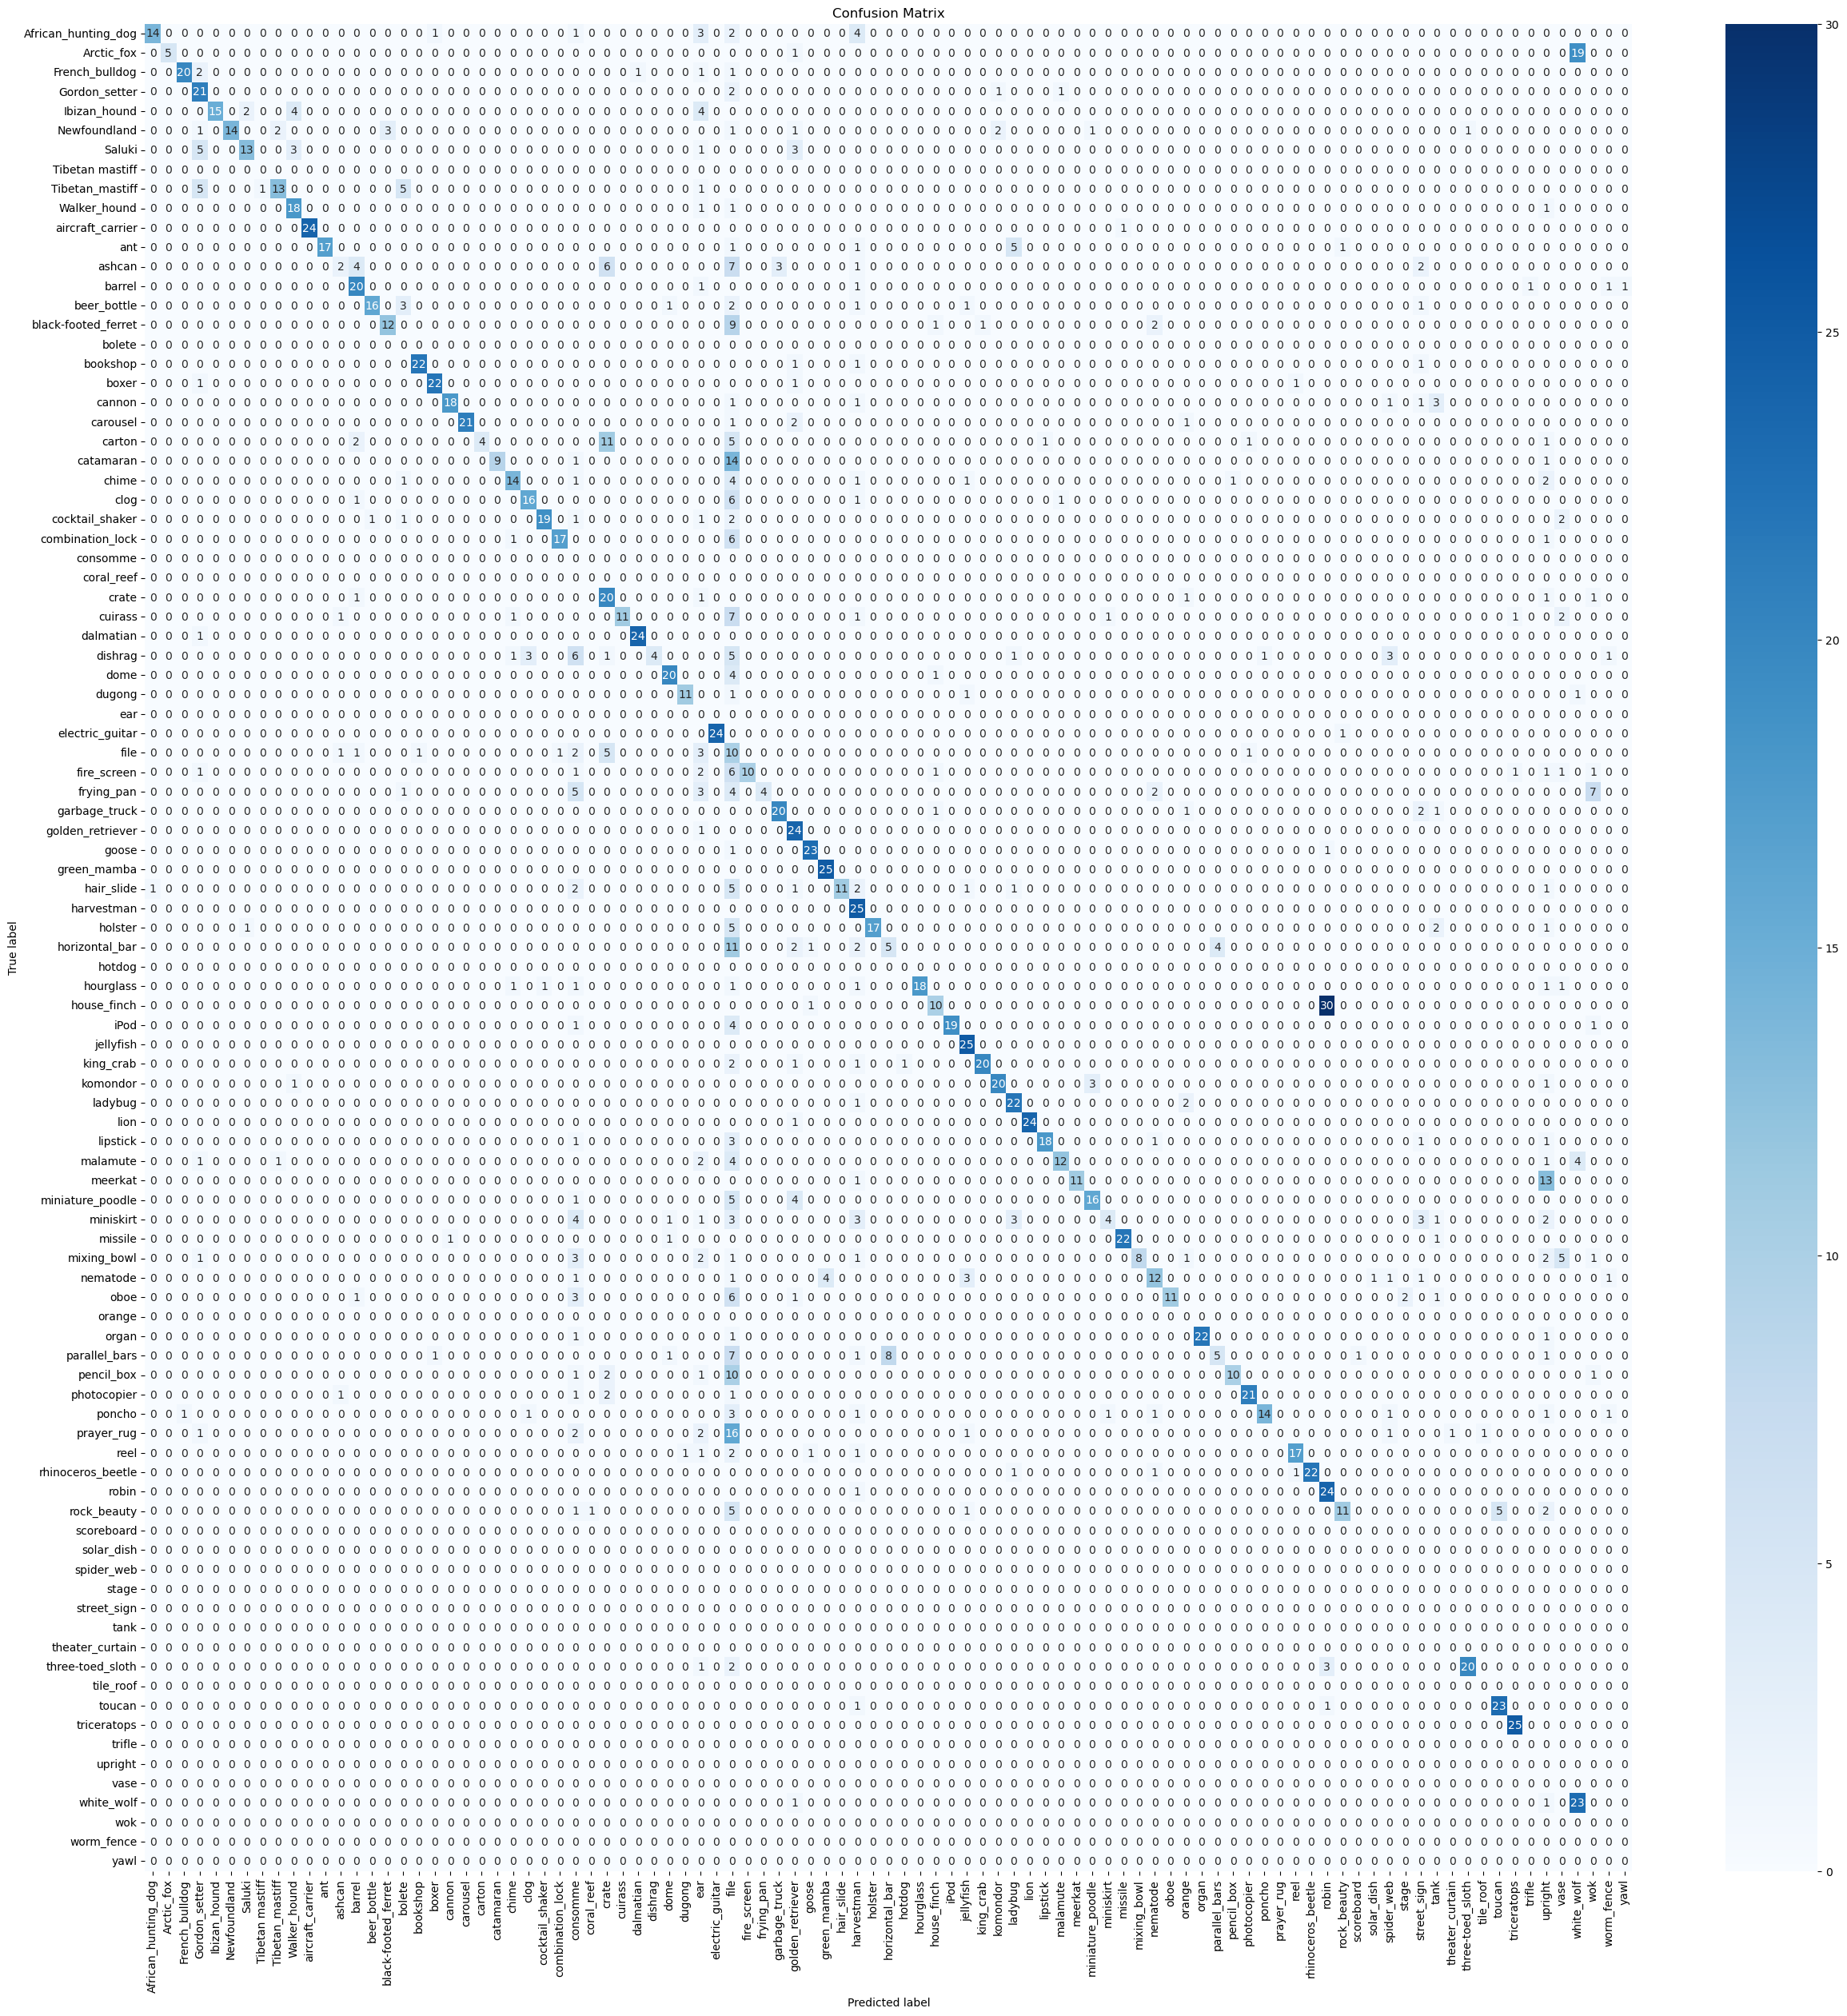

In [9]:
confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(30, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [10]:
print(classification_report(true_labels, predicted_labels, target_names=labels))

                     precision    recall  f1-score   support

African_hunting_dog       0.93      0.56      0.70        25
         Arctic_fox       1.00      0.20      0.33        25
     French_bulldog       0.95      0.80      0.87        25
      Gordon_setter       0.53      0.84      0.65        25
       Ibizan_hound       1.00      0.60      0.75        25
       Newfoundland       1.00      0.54      0.70        26
             Saluki       0.81      0.52      0.63        25
    Tibetan mastiff       0.00      0.00      0.00         0
    Tibetan_mastiff       0.81      0.52      0.63        25
       Walker_hound       0.69      0.86      0.77        21
   aircraft_carrier       1.00      0.96      0.98        25
                ant       1.00      0.68      0.81        25
             ashcan       0.40      0.08      0.13        25
             barrel       0.67      0.80      0.73        25
        beer_bottle       0.94      0.64      0.76        25
black-footed_ferret    

/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packa